In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *

# Getting the Dataset

In [8]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00389/DevanagariHandwrittenCharacterDataset.zip 

--2019-07-05 18:07:41--  https://archive.ics.uci.edu/ml/machine-learning-databases/00389/DevanagariHandwrittenCharacterDataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80417803 (77M) [application/x-httpd-php]
Saving to: ‘DevanagariHandwrittenCharacterDataset.zip’

DevanagariHandwritt 100%[===================>]  76.69M  73.8MB/s    in 1.0s    

2019-07-05 18:07:43 (73.8 MB/s) - ‘DevanagariHandwrittenCharacterDataset.zip’ saved [80417803/80417803]



In [0]:
!unzip DevanagariHandwrittenCharacterDataset.zip 

In [14]:
!mv content/DevanagariHandwrittenCharacterDataset/Test content/DevanagariHandwrittenCharacterDataset/train
!mv ~/data/DevanagariHandwrittenCharacterDataset/Test/ ~/data/DevanagariHandwrittenCharacterDataset/valid

mv: cannot stat 'content/DevanagariHandwrittenCharacterDataset/Test': No such file or directory
mv: cannot stat '/root/data/DevanagariHandwrittenCharacterDataset/Test/': No such file or directory


In [17]:
path = Path('DevanagariHandwrittenCharacterDataset')
path.ls()

[PosixPath('DevanagariHandwrittenCharacterDataset/Train'),
 PosixPath('DevanagariHandwrittenCharacterDataset/Test')]

In [18]:
path,type(path)

(PosixPath('DevanagariHandwrittenCharacterDataset'), pathlib.PosixPath)

In [20]:
fnames = get_image_files(path/'Train/character_17_tha/')
fnames[:5]

[PosixPath('DevanagariHandwrittenCharacterDataset/Train/character_17_tha/32783.png'),
 PosixPath('DevanagariHandwrittenCharacterDataset/Train/character_17_tha/87338.png'),
 PosixPath('DevanagariHandwrittenCharacterDataset/Train/character_17_tha/19907.png'),
 PosixPath('DevanagariHandwrittenCharacterDataset/Train/character_17_tha/85313.png'),
 PosixPath('DevanagariHandwrittenCharacterDataset/Train/character_17_tha/13891.png')]

## Reading and pre-processing the data

In [0]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
ImageDataBunch??

In [27]:
print(data.classes)
len(data.classes)

['character_10_yna', 'character_11_taamatar', 'character_12_thaa', 'character_13_daa', 'character_14_dhaa', 'character_15_adna', 'character_16_tabala', 'character_17_tha', 'character_18_da', 'character_19_dha', 'character_1_ka', 'character_20_na', 'character_21_pa', 'character_22_pha', 'character_23_ba', 'character_24_bha', 'character_25_ma', 'character_26_yaw', 'character_27_ra', 'character_28_la', 'character_29_waw', 'character_2_kha', 'character_30_motosaw', 'character_31_petchiryakha', 'character_32_patalosaw', 'character_33_ha', 'character_34_chhya', 'character_35_tra', 'character_36_gya', 'character_3_ga', 'character_4_gha', 'character_5_kna', 'character_6_cha', 'character_7_chha', 'character_8_ja', 'character_9_jha', 'digit_0', 'digit_1', 'digit_2', 'digit_3', 'digit_4', 'digit_5', 'digit_6', 'digit_7', 'digit_8', 'digit_9']


46

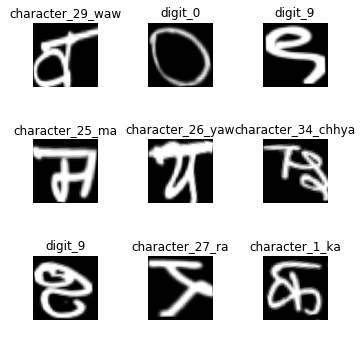

In [28]:
data.show_batch(rows=3, figsize=(5,5))

# ResNet-18

In [29]:
learn = ConvLearner(data, models.resnet18, metrics=accuracy)
learn.fit(2)

NameError: ignored

In [0]:
learn.save('stage-1-resnet18')

In [0]:
learn.lr_find()

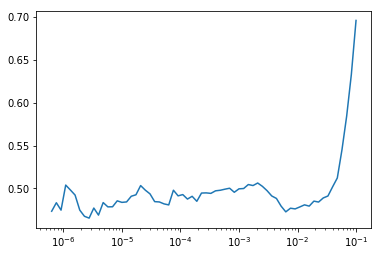

In [0]:
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(5, max_lr=slice(1e-6,1e-3))

Total time: 03:32
epoch  train loss  valid loss  accuracy
1      0.318084    0.157413    0.952319  (00:41)
2      0.213689    0.104085    0.967319  (00:41)
3      0.170204    0.074630    0.976594  (00:41)
4      0.141114    0.066027    0.980362  (00:44)
5      0.125690    0.066245    0.980000  (00:44)



Let's try a bigger model and see if the results get better.

# ResNet-34

In [30]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 55303064.79it/s]


In [31]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.422399,0.184035,0.056141,08:12
1,0.233767,0.082260,0.023750,13:56
2,0.132493,0.056157,0.017283,16:22
3,0.101371,0.049656,0.015326,07:53


In [0]:
learn.save('stage-1-resnet34')

In [0]:
learn.load('stage-1-resnet34')

In [34]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


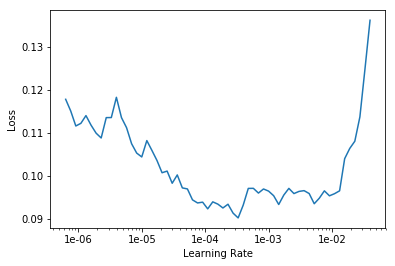

In [35]:
learn.recorder.plot()

In [36]:
learn.unfreeze()
learn.fit_one_cycle(8, max_lr=slice(1e-6,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.083907,0.044987,0.014130,07:58
1,0.079360,0.045237,0.013696,07:56
2,0.065954,0.037178,0.011033,07:55
3,0.048850,0.034258,0.008641,07:55
4,0.030867,0.025859,0.006902,07:55
5,0.016085,0.023417,0.006413,07:55
6,0.016198,0.019976,0.004837,07:55
7,0.008955,0.019178,0.004620,07:53


In [42]:
(1-0.004620)*100

99.53800000000001

In [0]:
learn.save('stage-2-resnet34')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

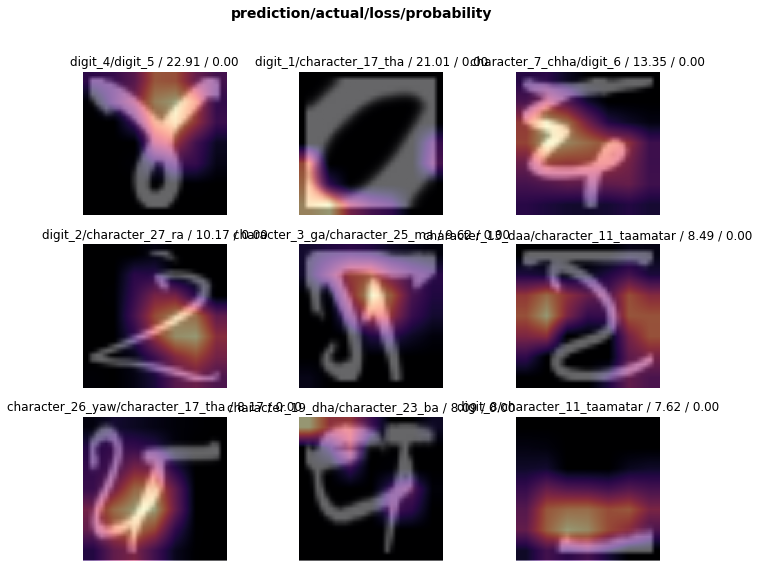

In [39]:
interp.plot_top_losses(9, figsize=(11,9))

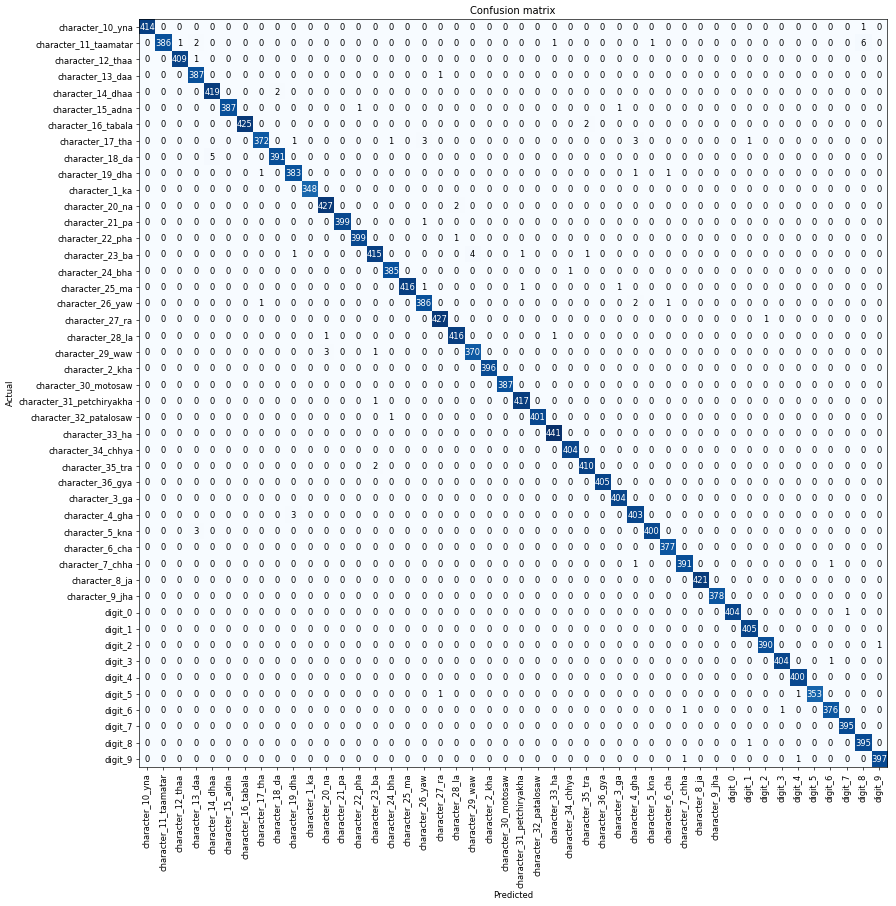

In [40]:
interp.plot_confusion_matrix(figsize=(15,15), dpi=60)

In [41]:
interp.most_confused(min_val=2)

[('character_11_taamatar', 'digit_8', 6),
 ('character_18_da', 'character_14_dhaa', 5),
 ('character_23_ba', 'character_29_waw', 4),
 ('character_17_tha', 'character_26_yaw', 3),
 ('character_17_tha', 'character_4_gha', 3),
 ('character_29_waw', 'character_20_na', 3),
 ('character_4_gha', 'character_19_dha', 3),
 ('character_5_kna', 'character_13_daa', 3),
 ('character_11_taamatar', 'character_13_daa', 2),
 ('character_14_dhaa', 'character_18_da', 2),
 ('character_16_tabala', 'character_35_tra', 2),
 ('character_20_na', 'character_28_la', 2),
 ('character_26_yaw', 'character_4_gha', 2),
 ('character_35_tra', 'character_23_ba', 2)]

# ResNet-50

In [0]:
learn = ConvLearner(data, models.resnet50, metrics=accuracy)

In [0]:
learn.fit_one_cycle(4)

Total time: 04:23
epoch  train loss  valid loss  accuracy
1      0.789296    0.456294    0.860435  (01:08)
2      0.308146    0.135865    0.959058  (01:04)
3      0.175457    0.070521    0.978261  (01:04)
4      0.134327    0.059987    0.980870  (01:05)



In [0]:
learn.save('stage-1-resnet50')

In [0]:
learn.load('stage-1-resnet50')

In [0]:
learn.lr_find()

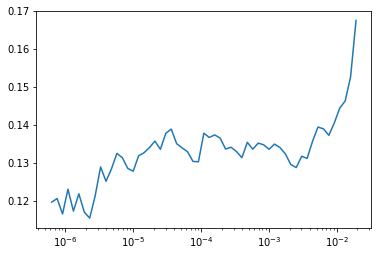

In [0]:
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(8, max_lr=slice(1e-6,1e-3))

Total time: 12:43
epoch  train loss  valid loss  accuracy
1      0.116627    0.052905    0.983696  (01:36)
2      0.121180    0.048702    0.985435  (01:35)
3      0.094759    0.040249    0.987101  (01:35)
4      0.083028    0.035133    0.989493  (01:35)
5      0.059225    0.027244    0.991014  (01:35)
6      0.042534    0.026524    0.991304  (01:35)
7      0.034328    0.022339    0.993551  (01:35)
8      0.031907    0.021899    0.993696  (01:35)



In [0]:
learn.save('stage-2-resnet50')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

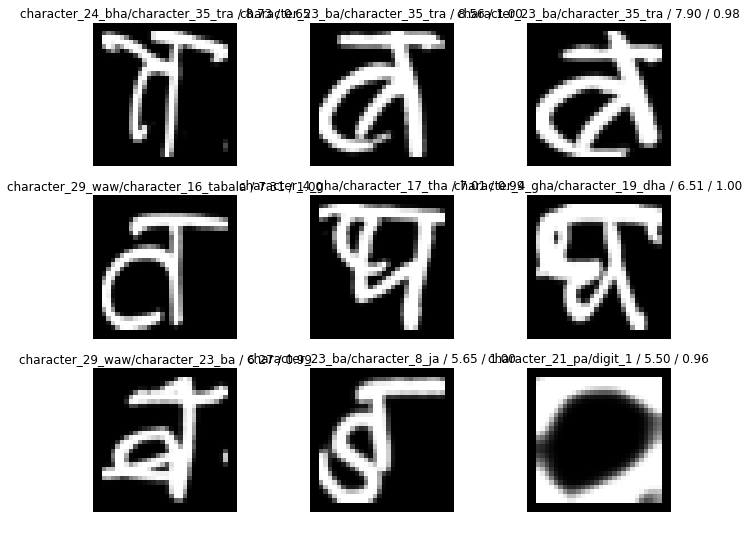

In [0]:
interp.plot_top_losses(9, figsize=(11,9))

# ResNet-101

In [0]:
learn = ConvLearner(data, models.resnet101, metrics=accuracy)

In [0]:
learn.fit_one_cycle(4)

Total time: 07:16
epoch  train loss  valid loss  accuracy
1      0.774025    0.427533    0.871884  (01:51)
2      0.285842    0.130146    0.958768  (01:49)
3      0.163996    0.075674    0.975652  (01:48)
4      0.113074    0.057097    0.982391  (01:48)



In [0]:
learn.save('stage-1-resnet101')

In [0]:
learn.lr_find()

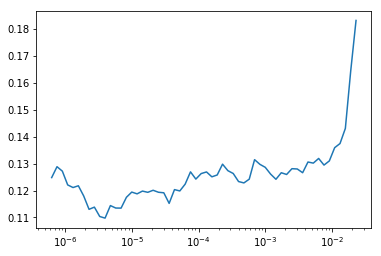

In [0]:
learn.recorder.plot()

In [0]:
learn.load('stage-1-resnet101')

In [0]:
learn.unfreeze()
learn.fit_one_cycle(8, max_lr=slice(1e-6,1e-3))

Total time: 20:55
epoch  train loss  valid loss  accuracy
1      0.116621    0.056349    0.981957  (02:36)
2      0.115955    0.064254    0.980000  (02:36)
3      0.100491    0.048213    0.985652  (02:36)
4      0.079325    0.039915    0.988261  (02:37)
5      0.050542    0.034663    0.990362  (02:36)
6      0.038541    0.024549    0.993406  (02:37)
7      0.029896    0.021652    0.994420  (02:36)
8      0.026083    0.022213    0.994203  (02:37)



In [0]:
learn.save('stage-2-resnet101')

In [0]:
learn.load('stage-1-resnet101')

In [0]:
learn.unfreeze()
learn.fit_one_cycle(8, max_lr=slice(1e-6,1e-4))

Total time: 21:07
epoch  train loss  valid loss  accuracy
1      0.119253    0.052170    0.984493  (02:36)
2      0.102148    0.062689    0.983116  (02:38)
3      0.088523    0.042752    0.987391  (02:37)
4      0.071650    0.033955    0.988478  (02:38)
5      0.062976    0.034526    0.989348  (02:38)
6      0.054611    0.027118    0.992029  (02:39)
7      0.045262    0.027281    0.991594  (02:38)
8      0.036281    0.025358    0.992101  (02:39)



In [0]:
learn.load('stage-1-resnet101')

In [0]:
learn.unfreeze()
learn.fit_one_cycle(8, max_lr=slice(1e-6,1e-2))

Total time: 21:05
epoch  train loss  valid loss  accuracy
1      0.190776    0.078919    0.975435  (02:37)
2      0.205994    0.095373    0.973406  (02:38)
3      0.182793    0.077445    0.978333  (02:37)
4      0.127601    0.051390    0.986884  (02:38)
5      0.076532    0.049713    0.987536  (02:37)
6      0.050238    0.046708    0.990145  (02:38)
7      0.022768    0.022091    0.993696  (02:38)
8      0.023925    0.022263    0.993551  (02:38)

